<a href="https://colab.research.google.com/github/pawel0508/MachineLearningBootcamp_I/blob/master/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import sklearn 
import seaborn as sns
from sklearn.datasets import make_regression


In [12]:
sns.set(font_scale = 1.3)
np.random.seed(42)
np.set_printoptions(precision=6, suppress=True)


Generowanie danych

In [13]:
data, target = make_regression(n_samples=200, n_features=1, noise = 20)
target = target**2

print(f'data: {data[:5]}')
print(f'target: {target[:5]}')

data: [[ 1.852278]
 [ 0.473592]
 [-1.230864]
 [ 0.625667]
 [-0.07201 ]]
target: [18795.440426  3481.301662  5866.345958  3697.116539    78.964854]


Regresja liniowa

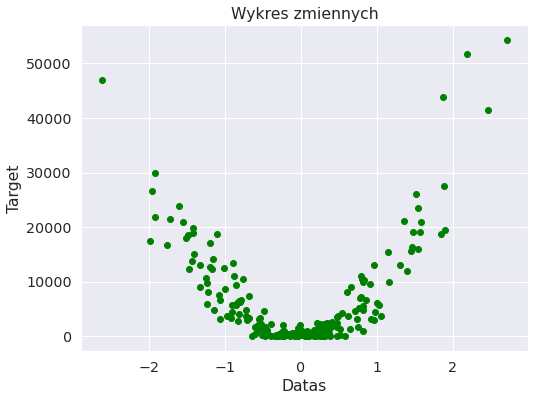

In [15]:
plt.figure(figsize=(8,6))
plt.title('Wykres zmiennych')
plt.xlabel('Datas')
plt.ylabel('Target')
plt.scatter(x = data, y = target, c = 'green')
plt.show()

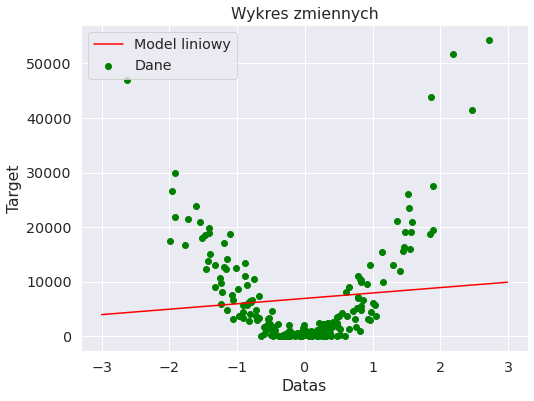

In [20]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(data, target)
plot_data = np.arange(-3, 3, 0.01).reshape(-1, 1)

plt.figure(figsize=(8,6))
plt.title('Wykres zmiennych')
plt.xlabel('Datas')
plt.ylabel('Target')
plt.plot(plot_data, lin.predict(plot_data), c = 'red', label = 'Model liniowy')
plt.scatter(x = data, y = target, c = 'green', label = 'Dane')
plt.legend()
plt.show()


Regresja drzew decyzyjnych

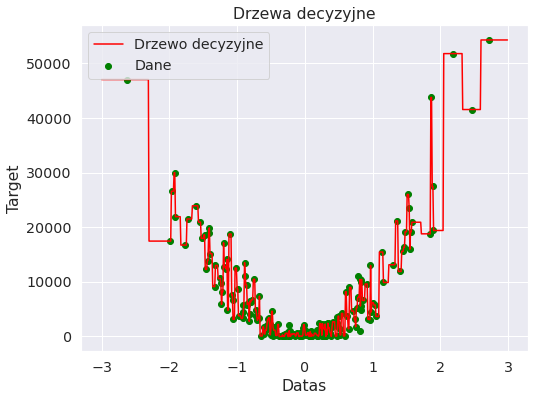

In [22]:
plt.figure(figsize=(8,6))
plt.title('Drzewa decyzyjne')
plt.xlabel('Datas')
plt.ylabel('Target')
plt.plot(plot_data, tree.predict(plot_data), c = 'red', label = 'Drzewo decyzyjne')
plt.scatter(x = data, y = target, c = 'green', label = 'Dane')
plt.legend()
plt.show()

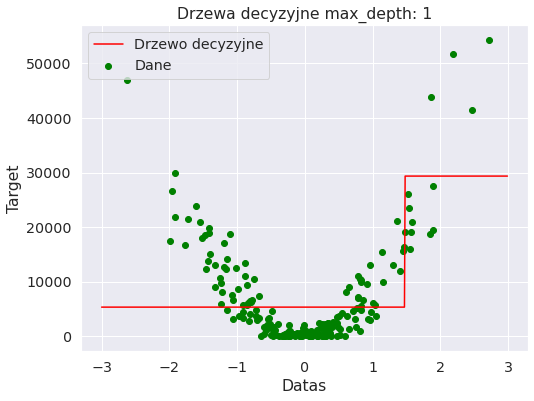

In [23]:
max_depth = 1

from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth= max_depth)
tree.fit(data, target)

plt.figure(figsize=(8,6))
plt.title(f'Drzewa decyzyjne max_depth: {max_depth}')
plt.xlabel('Datas')
plt.ylabel('Target')
plt.plot(plot_data, tree.predict(plot_data), c = 'red', label = 'Drzewo decyzyjne')
plt.scatter(x = data, y = target, c = 'green', label = 'Dane')
plt.legend()
plt.show()

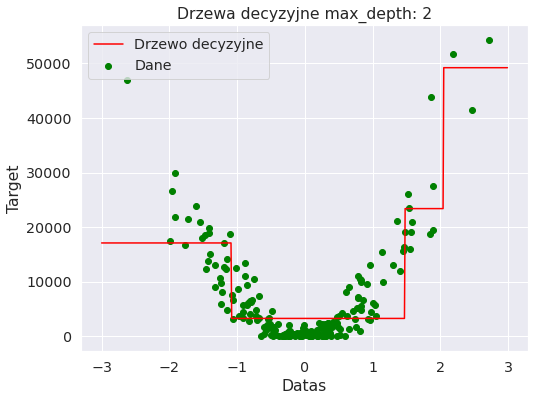

In [24]:
max_depth = 2

from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth= max_depth)
tree.fit(data, target)

plt.figure(figsize=(8,6))
plt.title(f'Drzewa decyzyjne max_depth: {max_depth}')
plt.xlabel('Datas')
plt.ylabel('Target')
plt.plot(plot_data, tree.predict(plot_data), c = 'red', label = 'Drzewo decyzyjne')
plt.scatter(x = data, y = target, c = 'green', label = 'Dane')
plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).



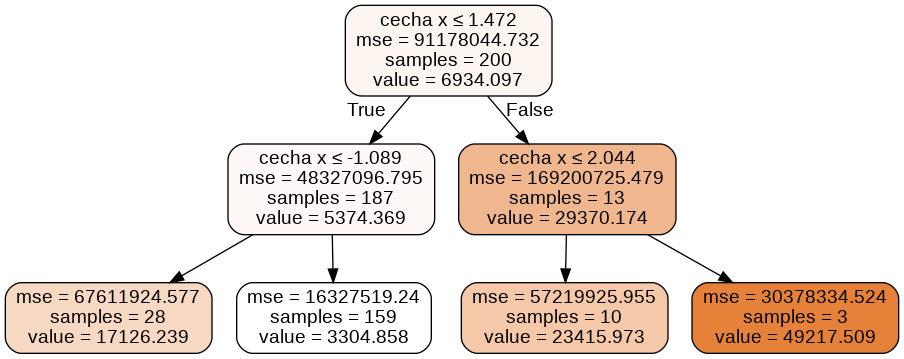

In [25]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names=['cecha x'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('graph.png')

Image(graph.create_png(), width=600)

In [42]:
def make_dt_regressor(max_depths = 2):
  tree = DecisionTreeRegressor(max_depth= max_depths)
  tree.fit(data, target) 

  plt.figure(figsize=(8, 6))
  plt.plot(plot_data, tree.predict(plot_data), c='red')
  plt.scatter(data, target)

  dot_data = StringIO()
  export_graphviz(tree, out_file=dot_data,
                  filled=True, rounded=True,
                  special_characters=True,
                  feature_names=['cecha x'])
  graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
  graph.write_png('graph.png')

  return Image(graph.create_png(), width=500*max_depth + max_depth * 500)




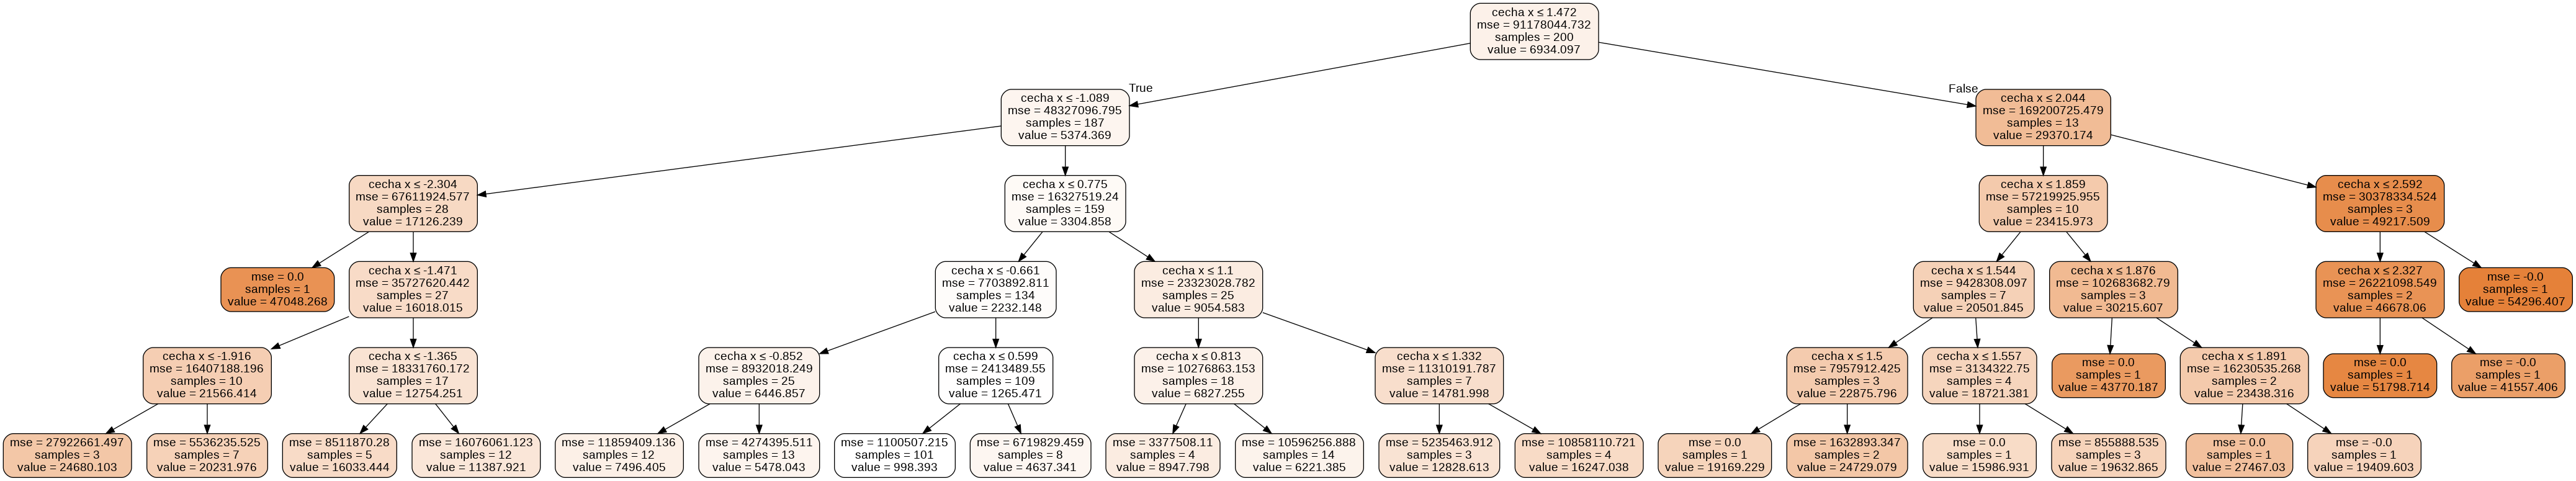

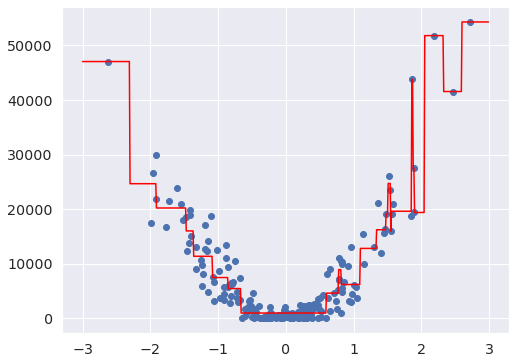

In [43]:
make_dt_regressor(max_depths = 5)